# 1

In [24]:
from sys import platform
import glob
import matplotlib.pyplot as plt
from random import shuffle, seed
from os.path import abspath
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from cv2 import resize
from helper_functions import shuffle_list, check_if_cat_windows, check_if_cat_mac, plot_sample_images
import numpy as np

In [2]:
seed(418)
current_directory = abspath("")

if platform == "darwin":
    train_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/train/*.jpg"
        )
    ])

    val_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/val/*.jpg"
        )
    ])

    test_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/test/*.jpg"
        )
    ])

if platform == "win32":
    train_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/train/*.jpg"
        )
    ])

    val_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/val/*.jpg"
        )
    ])

    test_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/test/*.jpg"
        )
    ])

## a)

In [3]:
train_images[1][0].shape[:2]

(500, 374)

In [4]:
def get_image_size(image_list:list):
    return [image[0].shape[:2] for image  in image_list]

image_sizes = pd.DataFrame(get_image_size(train_images) + get_image_size(val_images) + get_image_size(test_images), columns=['height', 'width'])

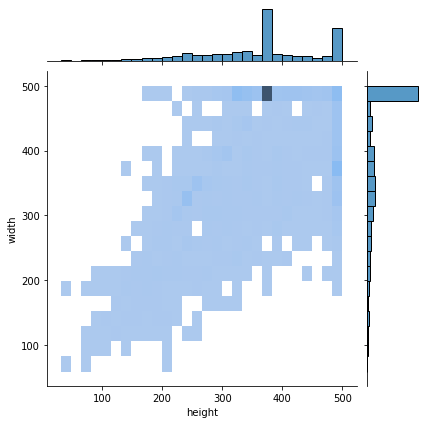

In [5]:
sns.jointplot(data=image_sizes,x='height', y='width', kind='hist');

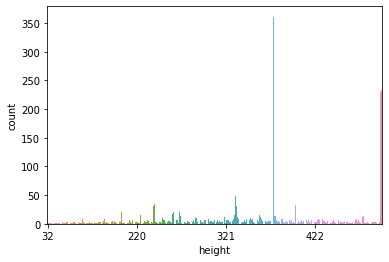

In [6]:
ax = sns.countplot(data=image_sizes, x='height');
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

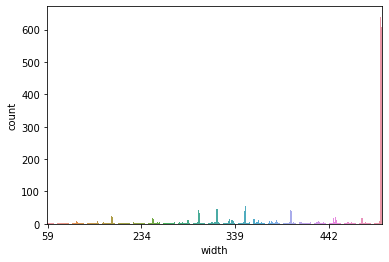

In [7]:
ax = sns.countplot(data=image_sizes, x='width');
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

In [8]:
image_sizes.min()

height    32
width     59
dtype: int64

## b)

From above grafs the smallest size of a picture is 32px in height, so I will scale all pictures to 32x32 which also helps reducing the feature count: smaller feature count makes the model faster to train; it's just a school lab so accuracy is not the most important

## c)

In [27]:
resized_train_images = [(resize(image[0],(32,32)), image[1]) for image in train_images]
resized_val_images = [(resize(image[0],(32,32)), image[1]) for image in val_images]
resized_test_images = [(resize(image[0],(32,32)), image[1]) for image in test_images]

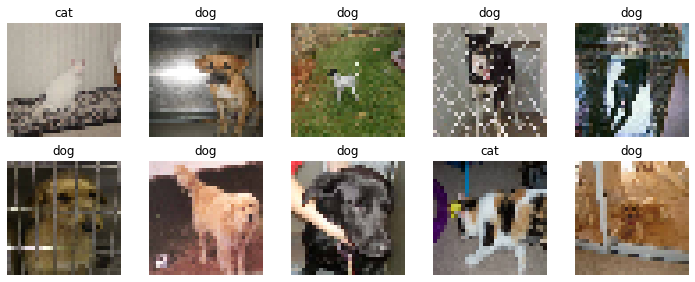

In [10]:
plot_sample_images(resized_train_images)

In [29]:
X_train = np.array([image[0] for image in resized_train_images])
X_val = np.array([image[0] for image in resized_val_images])
X_test = np.array([image[0] for image in resized_test_images])
X_train.shape

(1600, 32, 32, 3)

In [30]:
y_train = np.array([image[1] for image in resized_train_images])
y_val = np.array([image[1] for image in resized_val_images])
y_test = np.array([image[1] for image in resized_test_images])
y_train.shape

(1600,)

## d)